# Experiment for Signature Verification
Source: [SVC2004](https://www.cse.ust.hk/svc2004/)

In [236]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
%matplotlib inline

## Read Images

In [237]:
def getSignature(uid, sid) :
    if 1 <= uid <= 40 and 1 <= sid <= 40 :
        src = '../../data/user{}/'+ ('genuine' if 1 <= sid <= 20 else 'forged') +'/U{}S{}.jpg'
        src = src.format(uid, uid, sid)
        return cv2.resize(cv2.imread(src, cv2.IMREAD_GRAYSCALE), (250, 150))
    else :
        return None

def getGenuineSignature(uid, sid = -1) :
    if sid == -1: sid = random.randint(1, 20)
    return getSignature(uid, sid)

def getForgedSignature(uid, sid = -1) :
    if sid == -1: sid = random.randint(21, 40)
    if sid <= 20: sid += 20
    return getSignature(uid, sid)


## Visualization

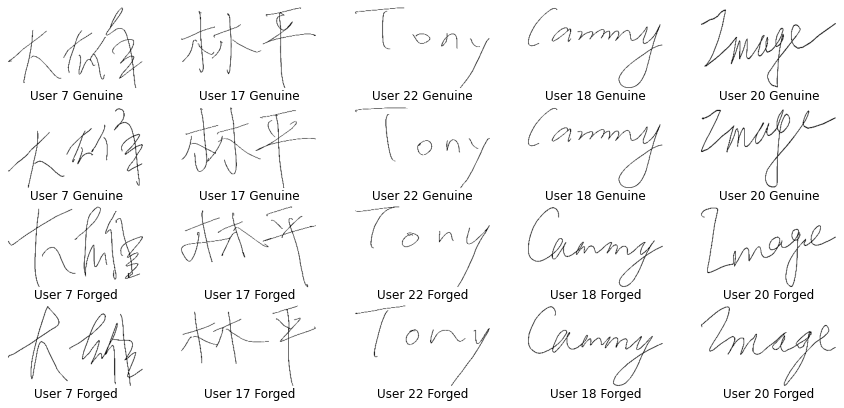

In [238]:
samples = 5
plt.figure(figsize = (15, 7))
for i in range(1, samples + 1) :
    uid = random.randint(1, 40)
    plt.subplot(4, samples, i)
    plt.axis('off')
    plt.title('User {} Genuine'.format(uid), y = -0.2)
    plt.imshow(getGenuineSignature(uid), cmap='gray')

    plt.subplot(4, samples, samples + i)
    plt.axis('off')
    plt.title('User {} Genuine'.format(uid), y = -0.2)
    plt.imshow(getGenuineSignature(uid), cmap='gray')
    
    plt.subplot(4, samples, samples * 2 + i)
    plt.axis('off')
    plt.imshow(getForgedSignature(uid), cmap='gray')
    plt.title('User {} Forged'.format(uid), y = -0.2)

    plt.subplot(4, samples, samples * 3 + i)
    plt.axis('off')
    plt.imshow(getForgedSignature(uid), cmap='gray')
    plt.title('User {} Forged'.format(uid), y = -0.2)

## Pre-Expreiment

### Feature Extraction

We extract feature from 1 reference genuine signature, 1 test genuine and 1 test forged signature. First, randomly pick 3 signatures of 1 user:

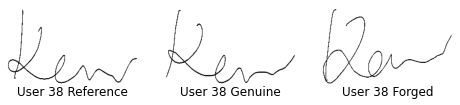

In [245]:
uid = random.randint(1, 40)
reference = getGenuineSignature(uid)
genuine = getGenuineSignature(uid)
forged = getForgedSignature(uid)

# Visualization
plt.figure(figsize = (8, 3))

plt.subplot(1, 3, 1)
plt.axis('off')
plt.title('User {} Reference'.format(uid), y = -0.2)
plt.imshow(reference, cmap='gray')

plt.subplot(1, 3, 2)
plt.axis('off')
plt.title('User {} Genuine'.format(uid), y = -0.2)
plt.imshow(genuine, cmap='gray')

plt.subplot(1, 3, 3)
plt.axis('off')
plt.title('User {} Forged'.format(uid), y = -0.2)
plt.imshow(forged, cmap='gray')

Next, use Canny detector to detect corners in signatures:

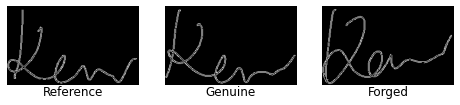

In [246]:

reference_canny = cv2.Canny(reference, threshold1 = 30, threshold2 = 100)
genuine_canny = cv2.Canny(genuine, threshold1 = 30, threshold2 = 100)
forged_canny = cv2.Canny(forged, threshold1 = 30, threshold2 = 100)

# def getCornerVisualization(img) :
#     dst = cv2.dilate(cv2.cornerHarris(img, blockSize = 3, ksize = 3, k = 0.04), None)
#     pos = cv2.goodFeaturesToTrack(dst, 0, 0.01, 15).astype(np.int16)
#     res = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2RGB)
#     for i in range(len(pos)):
#         cv2.circle(res, (pos[i][0][0], pos[i][0][1]), 5, [255,0,0], thickness=3)
#     return res


# Visualization
plt.figure(figsize = (8, 3))

plt.subplot(1, 3, 1)
plt.axis('off')
plt.title('Reference', y = -0.2)
plt.imshow(reference_canny, cmap='gray')

plt.subplot(1, 3, 2)
plt.axis('off')
plt.title('Genuine', y = -0.2)
plt.imshow(genuine_canny, cmap='gray')

plt.subplot(1, 3, 3)
plt.axis('off')
plt.title('Forged', y = -0.2)
plt.imshow(forged_canny, cmap='gray')

Moreover, extract SIFT features from images:

111
117
109


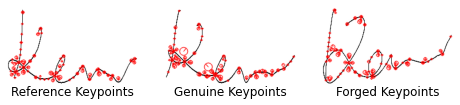

In [254]:
extractor = cv2.SIFT_create()

def detectAndCompute(image, spacing = 1) :
    # canny = cv2.Canny(image, threshold1 = 30, threshold2 = 100)
    # kp = [cv2.KeyPoint(x, y, size = 16) for x in range(0, image.shape[1], spacing) for y in range(0, image.shape[0], spacing) if canny[y, x] == 255]
    # dst = cv2.dilate(cv2.cornerHarris(reference, blockSize = 3, ksize = 3, k = 0.04), None)
    # pos = cv2.goodFeaturesToTrack(dst, 0, 0.01, 15).astype(np.int16)
    # kp = [cv2.KeyPoint(pos[i][0][0], pos[i][0][1], size = 3) for i in range(len(pos))]
    # _, des = cv2.SIFT_create().compute(image, kp)
    # cv2.imshow('', image[image == 255])
    # cv2.waitKey(0)
    mask = np.array(np.where(image, 0, 255), dtype=np.uint8)
    kp, des = cv2.KAZE_create().detectAndCompute(image, None)
    print(len(kp))
    return kp, des

kp_ref, des_ref = detectAndCompute(reference)
kp_gen, des_gen = detectAndCompute(genuine)
kp_for, des_for = detectAndCompute(forged)

# kp_ref, des_ref = extractor.detectAndCompute(reference_canny, None)
# kp_gen, des_gen = extractor.detectAndCompute(genuine_canny, None)
# kp_for, des_for = extractor.detectAndCompute(forged_canny, None)

def getKeypointVisulization(image, keypoints) :
    return cv2.drawKeypoints(image, keypoints, None, (255, 0, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize = (8, 3))

plt.subplot(1, 3, 1)
plt.axis('off')
plt.title('Reference Keypoints', y = -0.2)
plt.imshow(getKeypointVisulization(reference, kp_ref))

plt.subplot(1, 3, 2)
plt.axis('off')
plt.title('Genuine Keypoints', y = -0.2)
plt.imshow(getKeypointVisulization(genuine, kp_gen))

plt.subplot(1, 3, 3)
plt.axis('off')
plt.title('Forged Keypoints', y = -0.2)
plt.imshow(getKeypointVisulization(forged, kp_for))


Now we try to match reference and genuine/forged signatures:

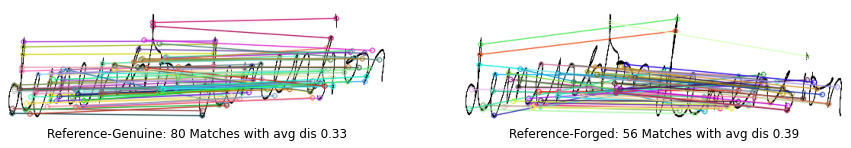

In [242]:
def getDivisionMatchesAndVisualization(img1, kp1, des1, img2, kp2, des2) :
    bf = cv2.BFMatcher(crossCheck = True)
    matches = []
    kp1_blocks = []
    kp2_blocks = []

    cols = 3
    rows = 2
    dx = img1.shape[1] // cols
    dy = img1.shape[0] // rows

    for x in range(cols) :
        for y in range(rows) :
            kp1_block = []
            des1_block = []
            kp2_block = []
            des2_block = []
            for kp, des in zip(kp1, des1):
                if (int(kp.pt[0]) // dx) == x and  (int(kp.pt[1]) // dy) == y :
                    kp1_block.append(kp)
                    des1_block.append(des)
            for kp, des in zip(kp2, des2):
                if (int(kp.pt[0]) // dx) == x and  (int(kp.pt[1]) // dy) == y :
                    kp2_block.append(kp)
                    des2_block.append(des)
            if len(des1_block) == 0 or len(des2_block) == 0 : continue
            
            matches_block = bf.match(np.array(des1_block), np.array(des2_block))
            matches_block = [cv2.DMatch(len(kp1_blocks)+match.queryIdx, len(kp2_blocks)+match.trainIdx, match.distance) for match in matches_block]
            matches += matches_block
            kp1_blocks += kp1_block
            kp2_blocks += kp2_block
    
    return matches, cv2.drawMatches(img1, kp1_blocks, img2, kp2_blocks, matches[::1+len(matches)//200], None, flags=2)


def getNaiveMatchesAndVisualization(img1, kp1, des1, img2, kp2, des2) :
    # Cross check
    bf = cv2.BFMatcher(crossCheck = True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x:x.distance)

    # # Ratio test (alternative)
    # bf = cv2.BFMatcher()
    # matches = bf.knnMatch(des1, des2, k = 2)
    # good = []
    # for m,n in matches:
    #     if m.distance < 0.75 * n.distance:
    #         good.append(m)
    # matches = sorted(good, key = lambda x:x.distance)
    return matches, cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=2)

plt.figure(figsize = (15, 7))

matches, result_matches = getDivisionMatchesAndVisualization(reference, kp_ref, des_ref, genuine, kp_gen, des_gen)

plt.subplot(1, 2, 1)
plt.axis('off')

plt.title('Reference-Genuine: {} Matches with avg dis {:.2f}'.format(len(matches), np.mean(list(map(lambda x:x.distance, matches)))), y = -0.2)
plt.imshow(result_matches)

matches, result_matches = getDivisionMatchesAndVisualization(reference, kp_ref, des_ref, forged, kp_for, des_for)
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('Reference-Forged: {} Matches with avg dis {:.2f}'.format(len(matches), np.mean(list(map(lambda x:x.distance, matches)))), y = -0.2)
plt.imshow(result_matches)

## Bag of Visual Words

Build codebook:

In [281]:
TRAIN_NUM = 32
kaze = cv2.KAZE_create()
descriptors = []
for uid in tqdm(range(1, TRAIN_NUM + 1)):
    for sid in range(1, 41):
        signature = getSignature(uid, sid)
        _, des = kaze.detectAndCompute(signature, None)
        for d in des: descriptors.append(d)
descriptors = np.asarray(descriptors)

100%|██████████| 32/32 [00:28<00:00,  1.13it/s]


## Classification by BOW

Try to classify each user's signature using a Support Vector Machine.

In [307]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from tqdm import tqdm

x_train = []
y_train = []

for uid in tqdm(range(1, TRAIN_NUM + 1)):
    sid_reference = list(range(1, 21))
    random.shuffle(sid_reference)
    sid_test = random.sample(list(range(1, 41)), 20)
    for i in range(20) :
        f_ref = getSignatureHistogram(uid, sid_reference[i])
        f_test = getSignatureHistogram(uid, sid_test[i])
        x_train.append(np.concatenate((f_ref, f_test)))
        y_train.append("genuine" if sid_test[i] <= 20 else "forged")

x_test = []
y_test = []
for uid in tqdm(range(TRAIN_NUM + 1, 41)):
    sid_reference = list(range(1, 21))
    random.shuffle(sid_reference)
    sid_test = random.sample(list(range(1, 41)), 20)
    for i in range(20) :
        f_ref = getSignatureHistogram(uid, sid_reference[i])
        f_test = getSignatureHistogram(uid, sid_test[i])
        x_test.append(np.concatenate((f_ref, f_test)))
        y_test.append("genuine" if sid_test[i] <= 20 else "forged")


 25%|██▌       | 8/32 [00:13<00:38,  1.62s/it]

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)
print(len(x_train), len(y_train), len(x_test), len(y_test))

16 16 4 4


In [ ]:
parameters = {
    'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
model = SVC(kernel='rbf')
model_grid = GridSearchCV(model, param_grid = parameters)
model_grid.fit(x_train, y_train)

model_SVM = model_grid.best_estimator_
print(model_SVM)

# model_SVM = SVC(C=1)

model_SVM.fit(x_train, y_train)
y_pred = model_SVM.predict(x_test)

print(classification_report(y_test, y_pred))

SVC(C=100, gamma=0.0001)
              precision    recall  f1-score   support

      forged       0.00      0.00      0.00         2
     genuine       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\NaiL23\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NaiL23\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NaiL23\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

It is surprised that this method has very high recall for forged signatures. That is to say, it might be a highly-safe verification method.

In [302]:
def verify(reference, image) :
    kp_ref, des_ref = detectAndCompute(reference)
    kp_ver, des_ver = detectAndCompute(image)
    matches, _ = getDivisionMatchesAndVisualization(reference, kp_ref, des_ref, image, kp_ver, des_ver)
    distances = list(map(lambda x:x.distance, matches))
    return model_SVM.predict([[len(matches), np.mean(distances), np.var(distances)]])[0]

uid = 3
images_to_verify = [getGenuineSignature(uid), getGenuineSignature(random.randint(1, 41)),  getForgedSignature(uid), getForgedSignature(random.randint(1, 41))]
print([verify(getGenuineSignature(uid), image) for image in images_to_verify])

107
107


ValueError: X has 3 features, but SVC is expecting 1024 features as input.